In [2]:
import os,sys
sys.path.append("/home/wergillius/tool/RNAlib/lib/python3.8/site-packages")
import PATH
import RNA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import Bio

/home/wergillius/Project/UTR_VAE


In [3]:
import seaborn as sns

In [4]:
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['axes.linewidth']= 2
plt.rcParams['xtick.labelsize']= 14
plt.rcParams['ytick.labelsize']= 14
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 4
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'

## check file

In [6]:
data_dir = "/data/users/wergillius/UTR_VAE/Ex_data"
os.listdir(data_dir)

['GSM3130443_designed_library.csv',
 'scaled_unmod.csv',
 'GSM3130435_egfp_unmod_1.csv',
 'GSM3130438_egfp_pseudo_2.csv',
 'GSM3130441_mcherry_1.csv',
 'GSM3130439_egfp_m1pseudo_1.csv',
 'GSM3130442_mcherry_2.csv',
 'GSM3130437_egfp_pseudo_1.csv',
 'GSM4084997_varying_length_25to100.csv',
 'GSM3130436_egfp_unmod_2.csv',
 'GSM3130440_egfp_m1pseudo_2.csv']

In [4]:
DF_ls = [pd.read_csv(os.path.join(data_dir,file)) for file in os.listdir(data_dir)]

/home/wergillius/.conda/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


KeyboardInterrupt: 

In [19]:
DF_ls[0].head()

,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,rl,id,info1,info2,info3,info4,library,mother,designed,match_score
0,0,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,1763,1880,2154,2959,2122,1896,2618,1899,...,4.823082,NC_000012.12:g.4911352C>T,rs886049508,chr12:4911298-4911381,snv,normal,snv,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,True,0.0
1,2,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,1108,1317,774,1201,1813,2011,3340,2454,...,6.252208,8527,ENSG00000105492,ENST00000343300,-,-,human_utrs,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,True,0.0
2,3,CCCTGATAACTGAATTGTTGTTTGTTTTATTTGTATTGTTGTTTGT...,918,894,523,782,877,999,1436,1799,...,7.499574,3409,20,8.81778335571289,-,-,target_no_uaug_allow_stop,CCCTGATAACTGAATTGTTGTTTGTTTTATTTGTATTGTTGTTTGT...,True,0.0
3,4,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,1439,1468,1322,1890,1347,1287,2007,2121,...,5.835379,8772,ENSG00000124570,ENST00000335686,-,-,human_utrs,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,True,0.0
4,5,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,952,876,854,1675,2170,1825,2585,1385,...,5.433105,6322,ENSG00000149932,ENST00000279396,-,-,human_utrs,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,True,0.0


In [18]:
len_ls=[]
for i in range(len(DF_ls)):
    print(os.listdir(data_dir)[i])
    len_ls.append(DF_ls[i].shape[0])

GSM3130443_designed_library.csv
GSM3130435_egfp_unmod_1.csv
GSM3130438_egfp_pseudo_2.csv
GSM3130441_mcherry_1.csv
GSM3130439_egfp_m1pseudo_1.csv
GSM3130442_mcherry_2.csv
GSM3130437_egfp_pseudo_1.csv
GSM4084997_varying_length_25to100.csv
GSM3130436_egfp_unmod_2.csv
GSM3130440_egfp_m1pseudo_2.csv


In [17]:
np.sum(len_ls)

2753885

In [208]:
test_df = pd.read_csv(os.path.join(data_dir,"GSM3130435_egfp_unmod_1.csv"))

design_df = pd.read_csv(os.path.join(data_dir,"GSM3130443_designed_library.csv"))
vleng_df = pd.read_csv(os.path.join(data_dir,"GSM4084997_varying_length_25to100.csv"))
vleng_df.shape

**vleng_df:**
```python
'random', 'controls', 'human', 'no_uaugs', 'with_uaugs'
```

In [51]:
my_set = (design_df.library == 'human_utrs')|(design_df.library == 'snv')

my_set2= vleng_df.set =='human'

In [52]:
vleng_df[my_set2].len.describe()

count    16739.000000
mean        62.093494
std         21.814237
min         25.000000
25%         43.000000
50%         62.000000
75%         81.000000
max        100.000000
Name: len, dtype: float64

## a pretrain data set

In [230]:
all_df = utils.read_UTR_csv()

merge_df = all_df[0].loc[:,'UTR']
for df in all_df[1:]:
    merge_df = pd.concat([merge_df,df.loc[:,'UTR']])

merge_df = pd.concat([merge_df,test_df.utr])

merge_df = pd.concat([merge_df,vleng_df.utr])
merge_df = pd.concat([merge_df,design_df.utr])

In [231]:
merge_df.shape[0]

568242

<font color ='navy'>**check data length**

In [232]:
all_dfshape = 0
for df in all_df:
    all_dfshape +=  df.shape[0] 

merge_df.shape[0] == vleng_df.shape[0] + design_df.shape[0]  + all_dfshape + test_df.shape[0]

In [239]:
uq_seq = merge_df.unique()

In [244]:
uq_seq_df = pd.DataFrame(uq_seq,columns=['utr'])

In [246]:
uq_seq_df.to_csv("/data/users/wergillius/UTR_VAE/multi_task/AE_seq.csv",index=False)

## just checking

In [5]:
vleng_df.columns

Index(['Unnamed: 0', 'utr', 'set', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', 'total_reads', 'r0', 'r1', 'r2', 'r3', 'r4',
       'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'total', 'rl',
       'len'],
      dtype='object')

In [53]:
design_df.columns

Index(['Unnamed: 0', 'utr', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', 'total', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5',
       'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r_total', 'rl',
       'id', 'info1', 'info2', 'info3', 'info4', 'library', 'mother',
       'designed', 'match_score', 'with_aug'],
      dtype='object')

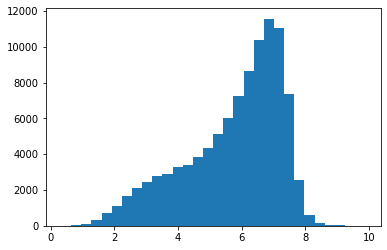

In [18]:
plt.hist(design_df.rl,bins=30);

In [20]:
np.quantile(design_df.rl.values,0.8)

7.063535202786

In [21]:
np.quantile(vleng_df.rl.values,0.8)

6.40784471356

In [34]:
design_df.loc[:,'with_aug']=design_df.utr.apply(lambda x : 'ATG' in x)

In [40]:
design_df[my_set]

(50600, 43)

In [39]:
design_df.loc[my_set,'with_aug'].sum()

12983

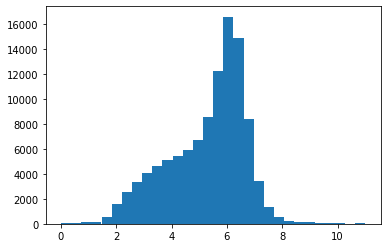

In [19]:
plt.hist(vleng_df.rl,bins=30);

In [25]:
np.sum(design_df.library == "target_allow_uaug_allow_stop")

5020

In [27]:
np.sum(design_df.library == "step_random_to_best_allow_uatg")

2427

In [18]:
design_df.info1.unique()

array(['rs886049508', 'ENSG00000105492', '20', ..., 'ENSG00000121068',
       '2618.0', nan], dtype=object)

In [32]:
vleng_df.utr.apply(lambda x: "AUG" in x).sum()

0


## new data inclusion
```python
my_set = (design_df.library == 'human_utrs')|(design_df.library == 'snv')
my_set2= vleng_df.set =='human'
```


In [57]:
df1 = design_df[my_set].loc[:,['utr','rl','library']]
df2 = vleng_df[my_set2].loc[:,['utr','rl','set']]
df2.columns = ['utr','rl','library']

In [75]:
merge_df = pd.concat([df1,df2])
merge_df.loc[:,'with_aug'] = merge_df.utr.apply(lambda x: 'ATG' in x)
merge_df.shape[0] == (df1.shape[0] + df2.shape[0])

True

In [88]:
from tqdm import tqdm

from models import extract_ss

from importlib import reload

In [145]:
all_seq = merge_df.utr.values
fold_result = [RNA.fold(seq) for seq in all_seq]
all_ss_string = [result[0] for result in fold_result]
all_mse = [result[1] for result in fold_result]
all_ptable = [RNA.ptable(ss)[1:] for ss in all_ss_string]
all_ss_notation = [extract_ss.parsing_secondary_structure(ss) for ss in all_ss_string]
all_loop_ls = [result[0] for result in all_ss_notation] 
all_block_ls = [result[1] if result != ['bad_seq'] else 'bad_seq' for result in all_ss_notation]

## convert regression into classification

In [4]:
merge_df = pd.read_csv("/data/users/wergillius/UTR_VAE/multi_task/pretrain_MTL_UTR.csv")

In [5]:
merge_df.shape

(67339, 18)

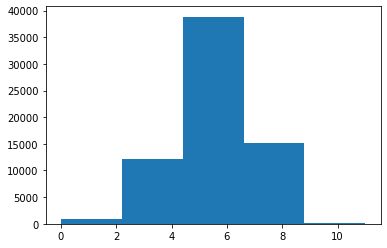

In [175]:
rl_ranges=plt.hist(merge_df.rl.values,bins=5);

rl_quantile = np.quantile(merge_df.rl.values,[0,0.2,0.4,0.6,0.8,1])
def in_part(x,divided_part):
    
    for i in range(5):
        if x >divided_part[i] and x <divided_part[i+1]:
            return i

in_part_by_ranges = lambda x:in_part(x,rl_ranges[1])
in_part_by_quantile = lambda x:in_part(x,rl_quantile)

## adding auxillary task label into dataframe

In [187]:
merge_df.loc[:,'by_range'] = merge_df.rl.apply(in_part_by_ranges)
merge_df.loc[:,'by_quantile'] = merge_df.rl.apply(in_part_by_quantile)
merge_df.loc[:,'ss_string'] = all_ss_string
merge_df.loc[:,'mse'] = all_mse
merge_df.loc[:,'ptable'] = all_ptable
merge_df.loc[:,'loops'] = all_loop_ls
merge_df.loc[:,'blocks']= all_block_ls

In [193]:
np.sum(merge_df.loops == 'bad_seq')

362

counting each loop type

In [201]:
for structure in ['Hairpin','Bulge','Internal_loop','Multi_loop']:
    print('detecting '+structure)
    temp_list = []
    
    for loop_ls in tqdm(all_loop_ls):
        temp_list.append(np.sum(np.array(loop_ls) == structure))
    
    locals()[structure+'_count'] = temp_list

for structure in ['Hairpin','Bulge','Internal_loop','Multi_loop']:
    merge_df.loc[:,structure] = locals()[structure+'_count']

In [204]:
count_stem = lambda x : np.sum(np.array(x) != 0 )/2

merge_df.loc[:,'num_mathced'] = merge_df.ptable.apply(count_stem)

In [65]:
merge_df.loc[:,'indexx'] = merge_df.index

In [64]:
merge_df.columns

Index(['utr', 'rl', 'library', 'with_aug', 'by_range', 'by_quantile',
       'ss_string', 'mse', 'ptable', 'loops', 'blocks', 'Hairpin', 'Bulge',
       'Internal_loop', 'Multi_loop', 'num_mathced', 'scaled_rl'],
      dtype='object')

In [33]:
merge_df.loc[:,'scaled_rl'] = preprocessing.StandardScaler().fit_transform(merge_df.loc[:,'rl'].values.reshape(-1,1))

In [66]:
merge_df.to_csv("/data/users/wergillius/UTR_VAE/multi_task/pretrain_MTL_UTR.csv",index=False)

## explore this data

In [37]:
merge_df = pd.read_csv("/data/users/wergillius/UTR_VAE/multi_task/pretrain_MTL_UTR.csv")

In [23]:
from sklearn import preprocessing

In [ ]:
['Hairpin','Bulge','Internal_loop','Multi_loop','num_mathced']

UAG, UAA, and UGA

- TC
- AT
- GT
- ATG
- 1stATGloc
- ATGframe
- NnnATG
- GCC
- GGC
- CGA
- TGT
- GCA
- CGG
- CCT
- CGGCGG
- CGGCGGCGG
- CGGCGGCGGCGG
- CCTCCT
- CCTCCTCCT
- CCTCCTCCTCCT
- GGG
- CCC
- TTT
- AAA


In [77]:
merge_df.head()

,utr,rl,library,with_aug,by_range,by_quantile,ss_string,mse,ptable,loops,blocks,Hairpin,Bulge,Internal_loop,Multi_loop,num_mathced,scaled_rl,indexx
0,CCCACCCCGGGCTCTCTCCTGGCCTCCCACCCCCGCGCCCGGCTTC...,4.823082,snv,False,2.0,1.0,......((((((.(.....(((....))).....).)))))).......,-13.7,"(0, 0, 0, 0, 0, 0, 42, 41, 40, 39, 38, 37, 0, ...","['Multi_loop', 'Hairpin']","[[0, 1, 3, 4], [2]]",1,0,0,1,10.0,-0.539277,0
1,CCGTTCCTCCCCGCAGTCCTTCCCCTCCACTCCCTTCCCCTTCTCT...,6.252208,human_utrs,False,2.0,3.0,............((((............................))...,-3.0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 47, 4...",['Hairpin'],[[0]],1,0,0,0,4.0,0.530173,1
2,CCTCTGCCCGCCGTTCTGCTCGCTCGCTCCCCGCTCTGGAGTCTGC...,5.835379,human_utrs,False,2.0,2.0,.........((......))..((..(((((.......)))))..))...,-8.6,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 18, 0, 0, 0, 0...","['Hairpin', 'Bulge', 'Internal_loop', 'Hairpin']","[[0], [1], [2, 4], [3]]",2,1,1,0,9.0,0.218250,2
3,CCGGCCCCGAGGGCAGGCTCTCCCCGGAGGCTCAGCCCCCTCTGCT...,5.433105,human_utrs,False,2.0,1.0,..(((...(((((..((((...((....))...))))))))).)))...,-16.4,"(0, 0, 46, 45, 44, 0, 0, 0, 42, 41, 40, 39, 38...","['Internal_loop', 'Bulge', 'Internal_loop', 'H...","[[0, 5], [1], [2, 4], [3]]",1,1,2,0,14.0,-0.082782,3
4,CGCCCCACCCCATCCTCCTGCCTTCCCGCGCTCCGGTGTCCCCCGC...,4.534654,snv,False,2.0,1.0,...................((......))((..(((......)))....,-6.1,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['Hairpin', 'Internal_loop', 'Hairpin']","[[0], [1, 3], [2]]",2,0,1,0,7.0,-0.755115,4


Hairpin

In [107]:
all_num = sorted(merge_df.Hairpin.unique())
all_mse = -1*merge_df.mse.values
all_mean = [merge_df[merge_df.Hairpin == num].rl.mean() for num in all_num]

In [108]:
all_rl = merge_df.rl.values
matched_len = merge_df.num_mathced.values
stratifyed = []

Text(0, 0.5, 'MRL')

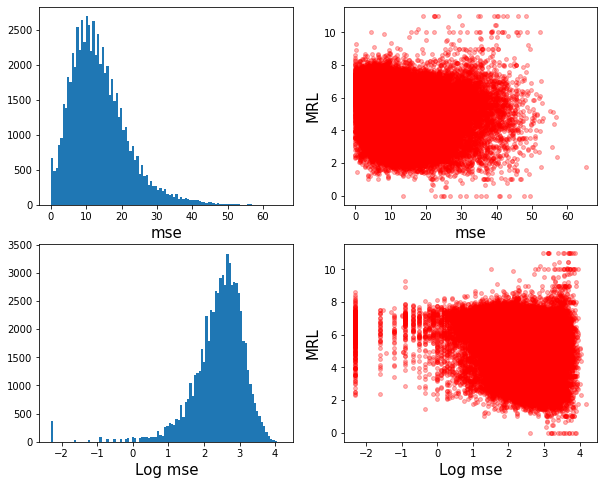

In [126]:
fig = plt.figure(figsize=(10,8))
axs = fig.subplots(2,2).flat
axs[0].hist(all_mse,bins=100)
axs[0].set_xlabel('mse',fontsize=15)

axs[1].scatter(all_mse,all_rl,s=15,alpha=0.3,c='r')
axs[1].set_xlabel('mse',fontsize=15)
axs[1].set_ylabel('MRL',fontsize=15)

axs[2].hist(np.log(all_mse+0.1),bins=100);
axs[2].set_xlabel('Log mse',fontsize=15)

axs[3].scatter(np.log(all_mse+1e-1),all_rl,s=15,alpha=0.3,c='r')
axs[3].set_xlabel('Log mse',fontsize=15)
axs[3].set_ylabel('MRL',fontsize=15)

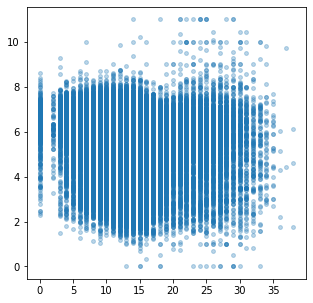

In [127]:
plt.figure(figsize=(5,5))
plt.scatter(matched_len,all_rl,s=15,alpha=0.3);

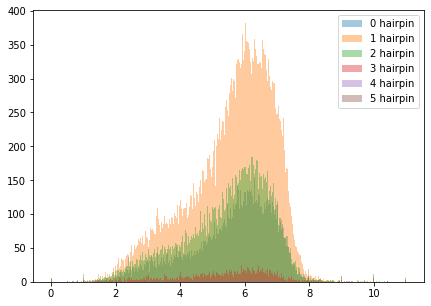

In [89]:
plt.figure(figsize=(7,5))
for num in all_num:
    plt.hist(merge_df[merge_df.Hairpin == num].rl.values,bins=400,alpha=0.4,label='%d hairpin'%num);
plt.legend()

### sequence motif


- with aug
- stop codon
    - TAG
    - TAA
    - TGA
    
- motif  
["TC","AT","GT","ATG","1stATGloc","ATGframe","NnnATG","GCC","GGC","CGA","TGT","GCA","CGG","CCT","CGGCGG","CGGCGGCGG","CGGCGGCGGCGG","CCTCCT","CCTCCTCCT","CCTCCTCCTCCT","GGG","CCC","TTT","AAA"]

In [181]:
detect_stop_codon = lambda x : ("TAG" in x) | ("TAA" in x) | ("TGA" in x)
first_aug = lambda x : x.index("ATG") if "ATG" in x else None

merge_df.loc[:,'with_stop_codon'] = merge_df.utr.apply(detect_stop_codon)
merge_df.loc[:,'first_aug'] = merge_df.utr.apply(first_aug)

In [ ]:
merge_df.with_

In [137]:
68%3

2

In [138]:
def detect_uORF(df):
    uORF = 0
    if (df.with_aug == True) & (df.with_stop_codon == True):
        
        utr = df.utr
        stop_codons = ["TAG","TAA","TGA"]
        
        # find out the stop codon persition
        earlest_stop_site = min([utr.index(codon) for codon in stop_codons if codon in utr])
        
        # compare the position
        start_site = utr.index("ATG")
        
        if start_site < earlest_stop_site:
            frame = (earlest_stop_site - start_site)%3  # if the stop codon was in frame with start codon 
            
            if frame == 0:
                uORF = earlest_stop_site - start_site
        
    return uORF

In [147]:
uORF_ls = [detect_uORF(merge_df.iloc[i,:]) for i in range(merge_df.shape[0])]

In [193]:
merge_df.loc[:,'uORF_len'] = uORF_ls
merge_df.loc[:,'with_uORF'] = merge_df.uORF_len.apply(lambda x : x !=0)
merge_df.loc[:,'aug_in_frame'] = merge_df.first_aug.apply(lambda x : x%3==0 if not pd.isna(x) else 2)

In [157]:
np.sum(uORF_ls != 0)

2160

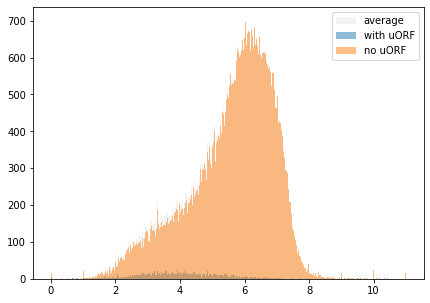

In [166]:
plt.figure(figsize=(7,5))
plt.hist(merge_df.loc[:,'rl'].values,bins=400,color='grey',alpha=0.1,label='average');
plt.hist(merge_df[merge_df.with_uORF == 1].rl.values,bins=400,alpha=0.5,label='with uORF');
plt.hist(merge_df[merge_df.with_uORF == 0].rl.values,bins=400,alpha=0.5,label='no uORF');
plt.legend()

In [231]:
merge_df.columns

Index(['utr', 'rl', 'library', 'with_aug', 'by_range', 'by_quantile',
       'ss_string', 'mse', 'ptable', 'loops', 'blocks', 'Hairpin', 'Bulge',
       'Internal_loop', 'Multi_loop', 'num_mathced', 'scaled_rl', 'indexx',
       'with_stop_codon', 'fist_aug', 'uORF_len', 'with_uORF', 'first_aug',
       'aug_in_frame'],
      dtype='object')

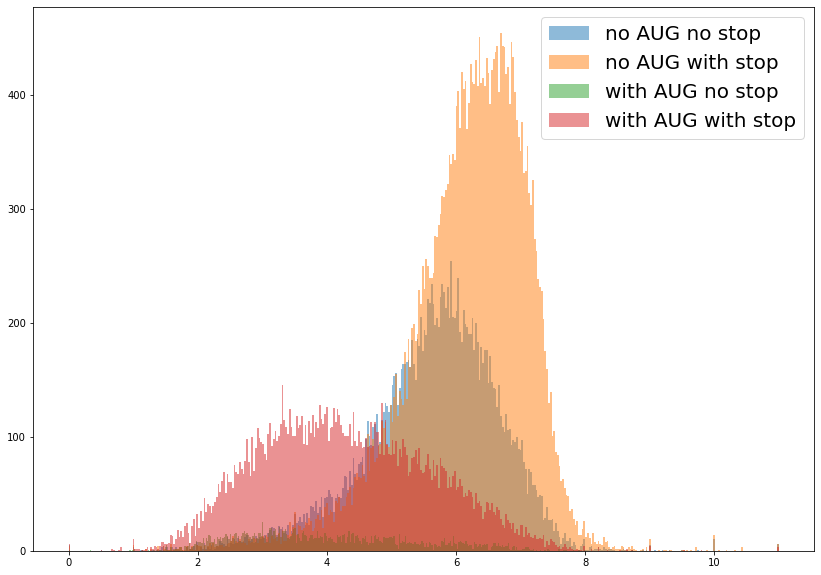

In [234]:
plt.figure(figsize=(14,10))
for AUG in range(2):
    label1 = ['no AUG ','with AUG '][AUG]
    for stop in range(2):
        label2 = ['no stop','with stop'][stop]
        plt.hist(merge_df[(merge_df.with_aug == AUG)&(merge_df.with_stop_codon == stop)].rl.values,bins=400,alpha=0.5,label=label1+label2);
plt.legend(fontsize=20)

#### uORF also have AUG

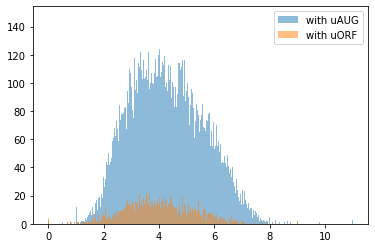

In [176]:
plt.hist(merge_df[(merge_df.with_aug == 1)&(merge_df.with_uORF != 1)].rl.values,bins=400,alpha=0.5,label='with uAUG');
plt.hist(merge_df[merge_df.with_uORF == 1].rl.values,bins=400,alpha=0.5,label='with uORF');
plt.legend()

#### AUG in frame or out of frame

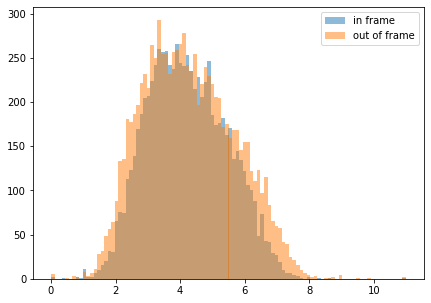

In [197]:
plt.figure(figsize=(7,5))
plt.hist(merge_df[merge_df.aug_in_frame == 1].rl.values,bins=100,alpha=0.5,label='in frame');
plt.hist(merge_df[merge_df.aug_in_frame == 0].rl.values,bins=100,alpha=0.5,label='out of frame');
plt.legend()

#### 

<font size=5 color='Fire'>with uAUG or not !!! most significant !!!!!
</font>

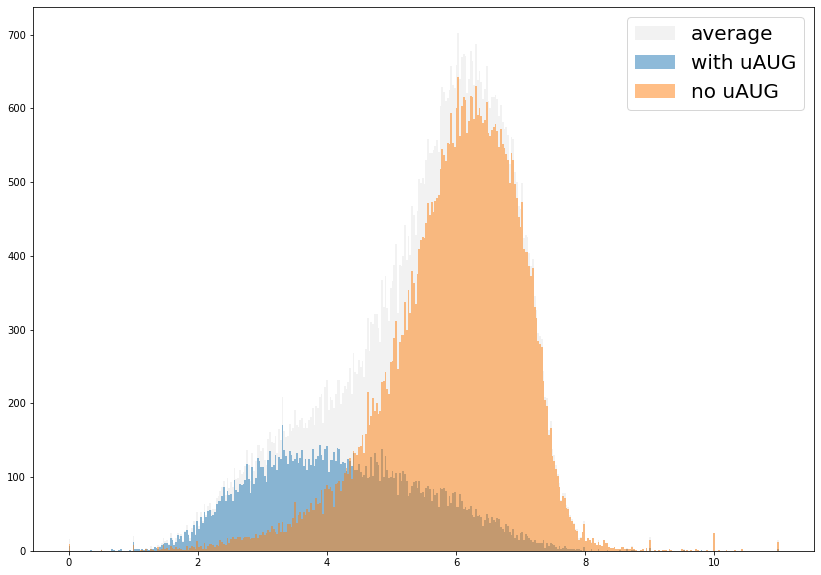

In [236]:
plt.figure(figsize=(14,10))
plt.hist(merge_df.loc[:,'rl'].values,bins=400,color='grey',alpha=0.1,label='average');
plt.hist(merge_df[merge_df.with_aug == 1].rl.values,bins=400,alpha=0.5,label='with uAUG');
plt.hist(merge_df[merge_df.with_aug == 0].rl.values,bins=400,alpha=0.5,label='no uAUG');
plt.legend(fontsize=20)

#### YK's motif

In [218]:
YK_motif=["GCC","GGC","CGA","TGT","GCA","CGG","CCT","CGGCGG","CGGCGGCGG","CGGCGGCGGCGG","CCTCCT","CCTCCTCCT","CCTCCTCCTCCT","GGG","CCC","TTT","AAA"]

YK_motif=["GCC","GGC","CGA","TGT","GCA","CGG","CCT","CGGCGG","CCTCCT","GGG","CCC","TTT","AAA"]

In [200]:
all_utr = merge_df.utr.values

In [220]:
motif_dict = {}
for motif in YK_motif:
    motif_dict[motif] = np.array([motif in x for x in all_utr])

In [221]:
len(motif_dict)

13

In [222]:
from tqdm import tqdm

100%|██████████| 13/13 [00:15<00:00,  1.17s/it]


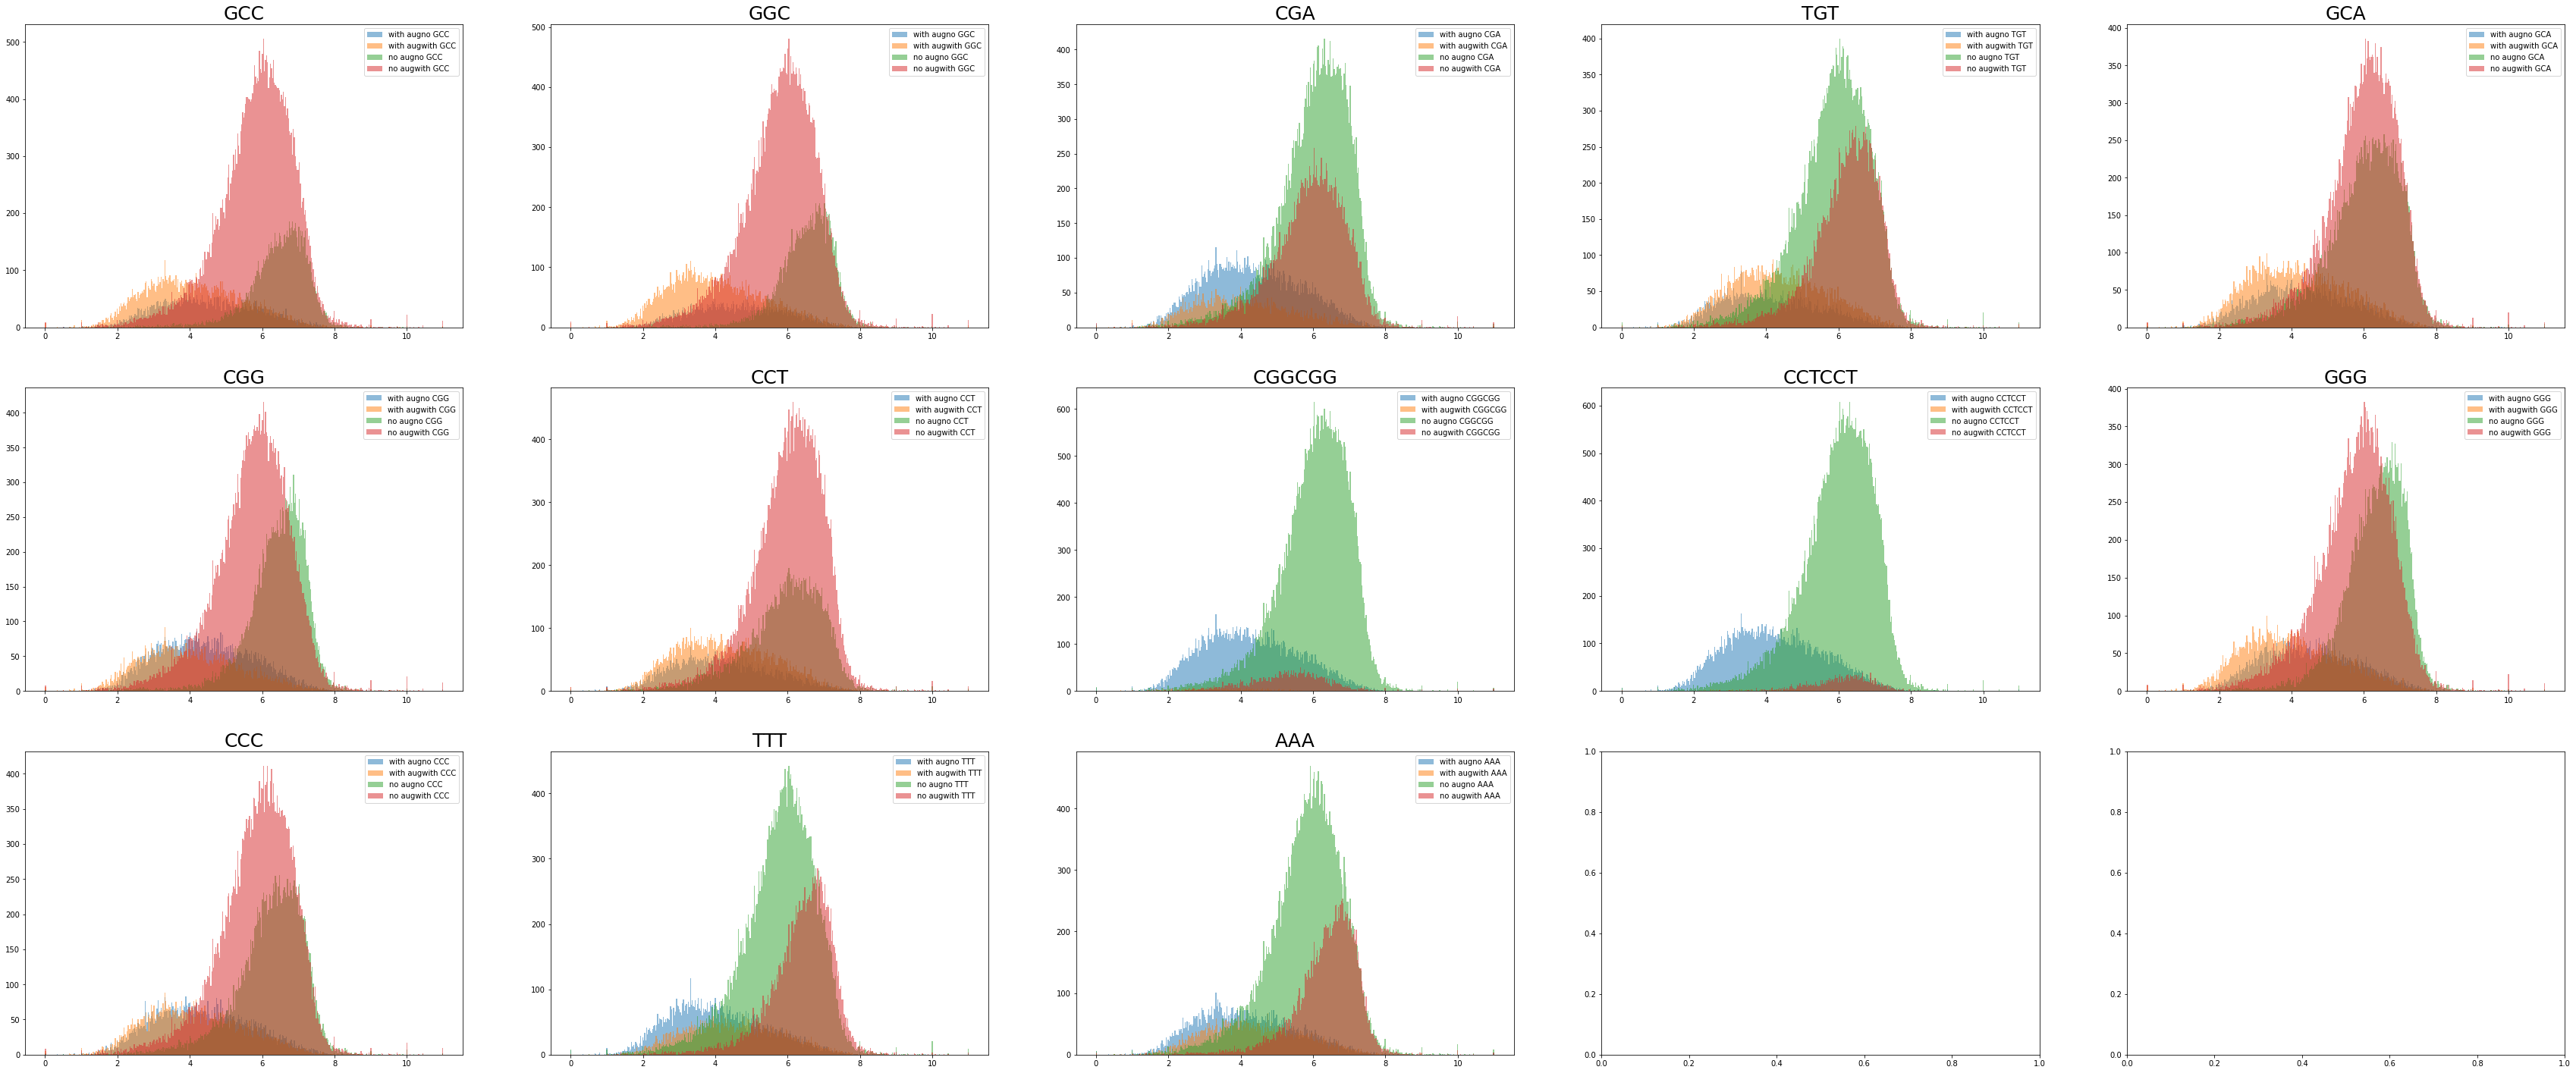

In [229]:
with_aug = merge_df.with_aug == 1
no_aug = merge_df.with_aug == 0
fig = plt.figure(figsize=(60,25))
axs = fig.subplots(3,5).flat
for i in tqdm(range(len(motif_dict))):
    motif = YK_motif[i]
    ax = axs[i]
    
    
    for idx,aug_index in enumerate([with_aug,no_aug]):
        aug_lab = ["with aug","no aug"][idx]
        for YK_m in range(2):
            data = merge_df[(motif_dict[motif]==YK_m)&(aug_index)].rl.values

            ax.hist(data,bins=400,alpha=0.5,label=aug_lab+["no ","with "][YK_m]+motif);

    ax.legend()
    ax.set_title(motif,fontsize=25)
    

In [ ]:
YK_motif=["GCC","GGC","CGG","CCT","CGGCGG","CCTCCT","GGG","CCC","TTT","AAA"]

100%|██████████| 17/17 [00:10<00:00,  1.66it/s]


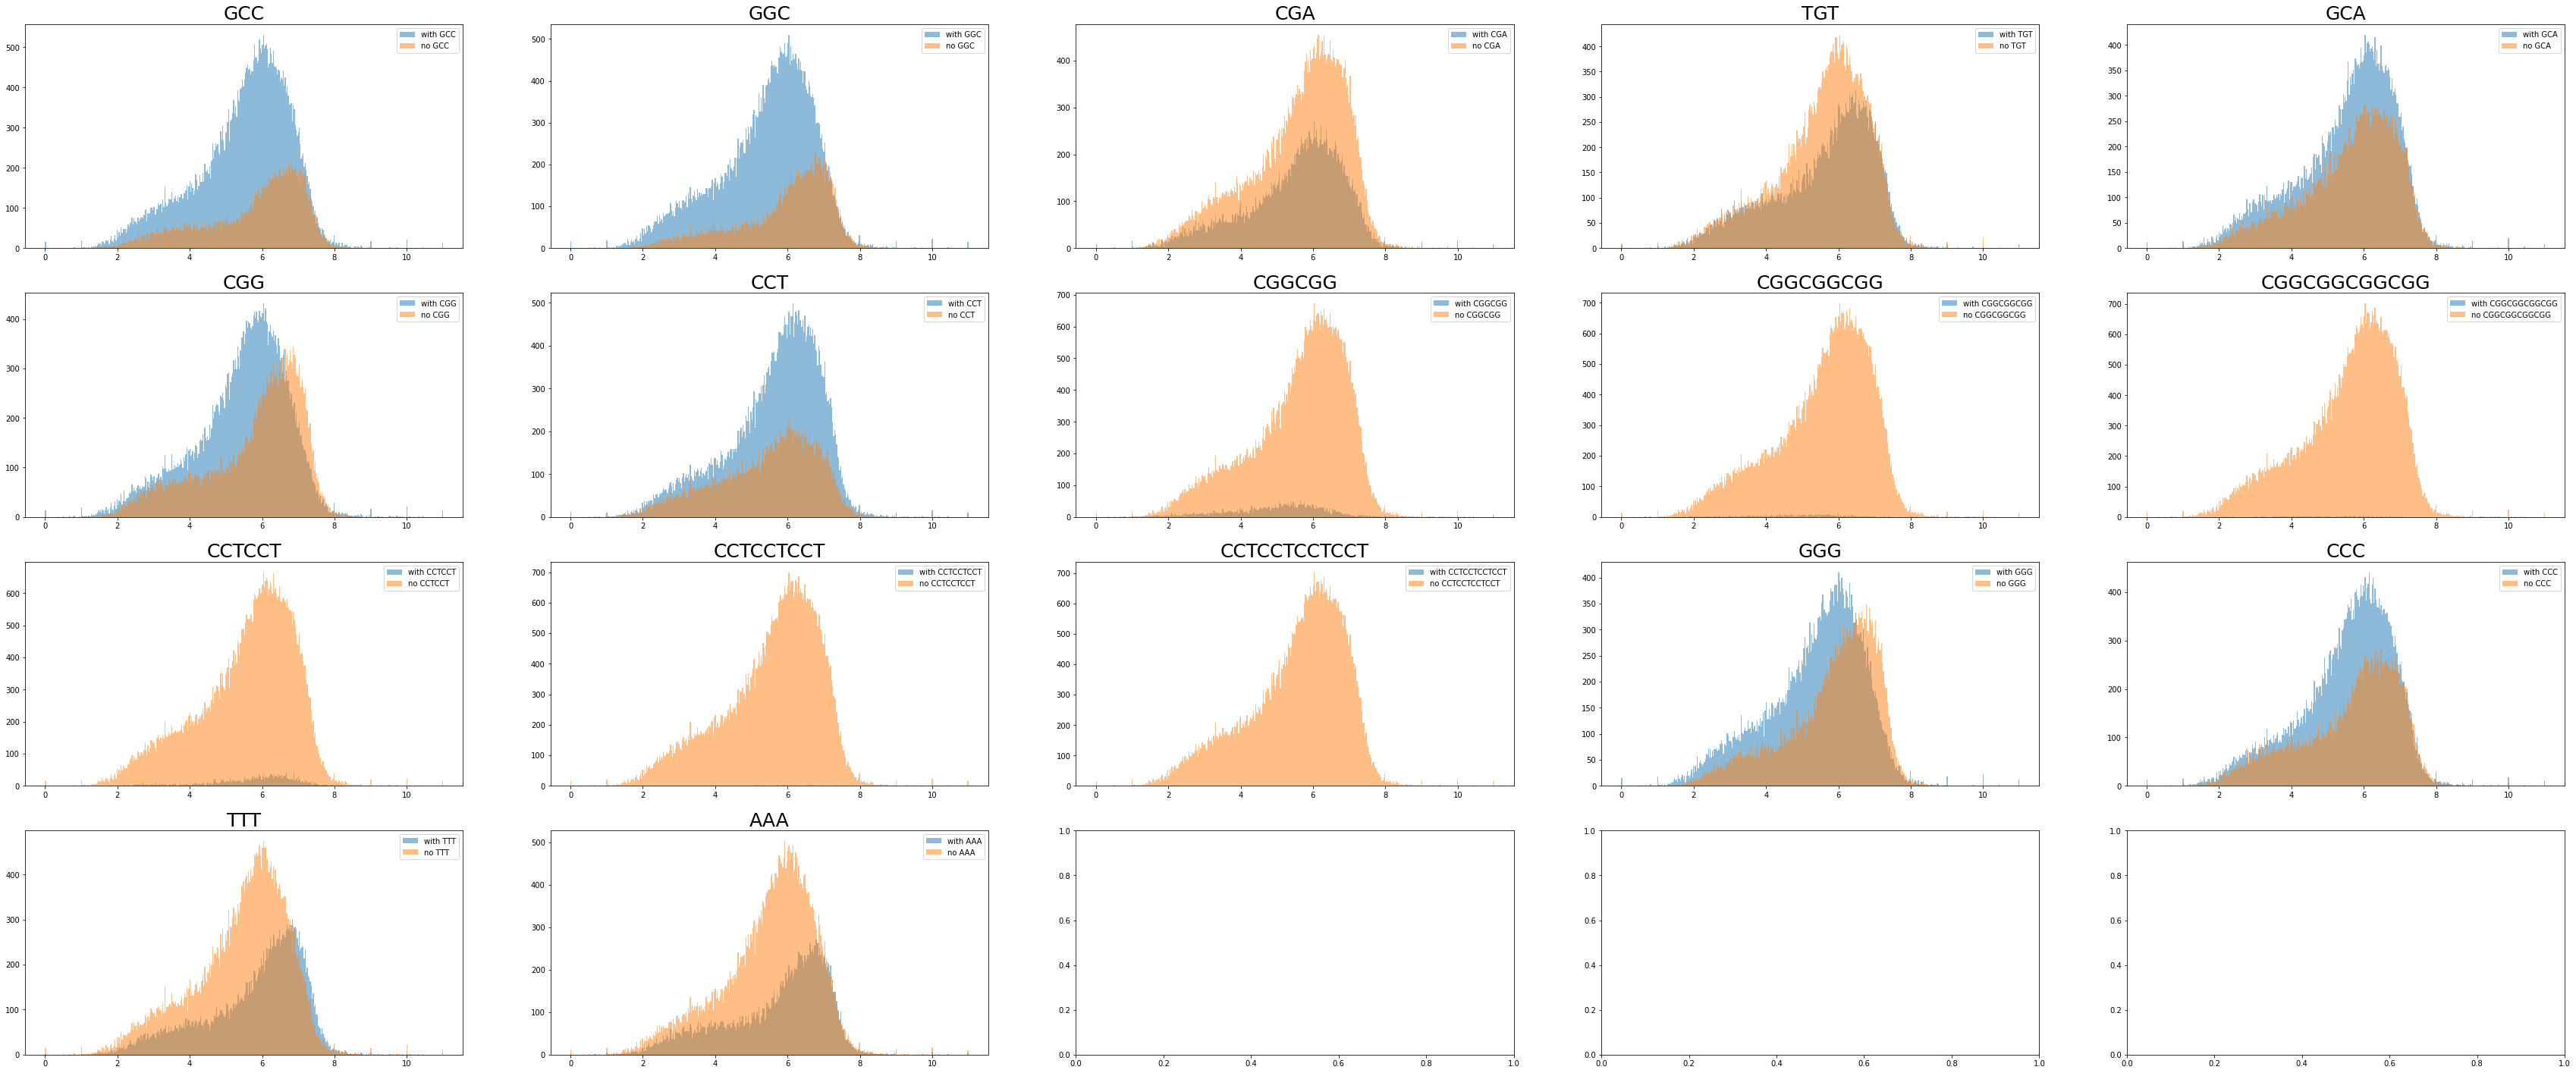

In [215]:
fig = plt.figure(figsize=(60,25))
axs = fig.subplots(4,5).flat

for i in tqdm(range(17)):
    motif = YK_motif[i]
    ax = axs[i]
    
    with_rl = merge_df[motif_dict[motif]==1].rl.values
    without_rl = merge_df[motif_dict[motif]==0].rl.values
    
    ax.hist(with_rl,bins=400,alpha=0.5,label='with %s'%motif);
    ax.hist(without_rl,bins=400,alpha=0.5,label='no %s'%motif);
    ax.legend()
    ax.set_title(motif,fontsize=25)
    

In [216]:
fig.savefig("some_plot/YK_motif_on_rl_distribution.pdf")

## save this 8 motif in csv

In [16]:
YK_motifs=["GCC","GGC","CGG","GGG","CCC","TTT","AAA"]
for motif in YK_motifs:
    unmod_df.loc[:,'with_%s'%motif] = unmod_df.utr.apply(lambda x: int(motif in x))

In [17]:
unmod_df.columns

Index(['Unnamed: 0', 'utr', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', 'total_reads', 'total', 'r0', 'r1', 'r2', 'r3',
       'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'rl',
       'scaled_rl', 'indexx', 'with_uAUG', 'with_GCC', 'with_GGC', 'with_CGG',
       'with_GGG', 'with_CCC', 'with_TTT', 'with_AAA'],
      dtype='object')

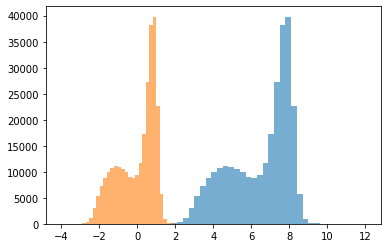

In [53]:
plt.hist(unmod_df.rl.values,bins=40,alpha=0.6);
plt.hist(unmod_df.scaled_rl.values,bins=40,alpha=0.6);

In [18]:
unmod_df.to_csv(os.path.join('/data/users/wergillius/UTR_VAE/multi_task/scaled_unmod.csv'),index=False)

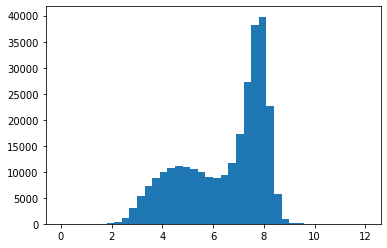

In [52]:
plt.hist(unmod_df.rl.values,bins=40);

## separate to two csv

In [7]:
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [8]:
# read in the total csv
unmod_df = pd.read_csv(os.path.join('/data/users/wergillius/UTR_VAE/multi_task/scaled_unmod.csv'))

# separate them
train = unmod_df.sort_values('total_reads',axis=0,ascending=False).iloc[20000:,:]

val = unmod_df.sort_values('total_reads',axis=0,ascending=False).iloc[:20000,:]

In [44]:
train_scaled_rl = preprocessing.StandardScaler().fit_transform(train.loc[:,'rl'].values.reshape(-1,1))

val_scaled_rl = preprocessing.StandardScaler().fit_transform(val.loc[:,'rl'].values.reshape(-1,1))

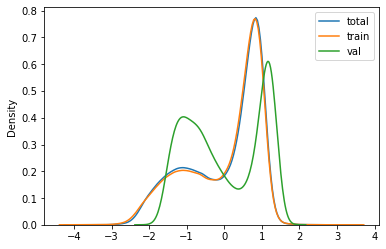

In [48]:
plt.figure(figsize=(6,4))
sns.kdeplot(scaled_rl.flatten(),label='total');
sns.kdeplot(train_scaled_rl.flatten(),label='train');
sns.kdeplot(val_scaled_rl.flatten(),label='val');
plt.legend()

<font size=4 color='darkred'>**the val set and train after scaling looks out-of-distributed**  
We should try seperate in other way
</font>

In [50]:
# read in the total csv
unmod_df = pd.read_csv(os.path.join('/data/users/wergillius/UTR_VAE/multi_task/scaled_unmod.csv'))

# separate them
train_unsort = unmod_df.iloc[20000:,:]

val_unsort = unmod_df.iloc[:20000,:]

<font color='navy' size=4>**noted that they are independently scaled**

In [51]:
train_unsort_scaled_rl = preprocessing.StandardScaler().fit_transform(train_unsort.loc[:,'rl'].values.reshape(-1,1))

val_unsort_scaled_rl = preprocessing.StandardScaler().fit_transform(val_unsort.loc[:,'rl'].values.reshape(-1,1))

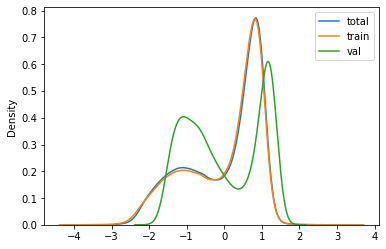

In [52]:
plt.figure(figsize=(6,4))
sns.kdeplot(scaled_rl.flatten(),label='total');
sns.kdeplot(train_unsort_scaled_rl.flatten(),label='train');
sns.kdeplot(val_unsort_scaled_rl.flatten(),label='val');
plt.legend()

In [53]:
train.loc[:,'scaled_rl'] = train_scaled_rl
val.loc[:,'scaled_rl'] = val_scaled_rl

train.to_csv('/data/users/wergillius/UTR_VAE/multi_task/train_split_like_paper.csv',index=False)
val.to_csv('/data/users/wergillius/UTR_VAE/multi_task/val_split_like_paper.csv',index=False)

## concate to a big dataset 
<font color='green' size=5>[eGFP]
 - GSM3130435_egfp_unmod_1.csv
 - GSM3130436_egfp_unmod_2.csv
 - GSM3130438_egfp_pseudo_1.csv  
 - GSM3130438_egfp_pseudo_2.csv
 - GSM3130443_designed_library.csv
 - GSM4084997_varying_length_25to100.csv

In [5]:
data_dir = "/data/users/wergillius/UTR_VAE/Ex_data"
os.listdir(data_dir)

['GSM3130443_designed_library.csv',
 'rl_big_df_new_seq_round7.npy',
 'rl_of_high_gen_seq_round8.npy',
 'scaled_unmod.csv',
 'rl_big_df_new_seq_round0.npy',
 'GSM3130435_egfp_unmod_1.csv',
 'rl_of_high_gen_seq_round1.npy',
 'rl_big_df_new_seq_round9.npy',
 'rl_of_high_gen_seq_round6.npy',
 'random_index.M.npy',
 'GSM3130438_egfp_pseudo_2.csv',
 'GSM3130441_mcherry_1.csv',
 'big_model_dataset.csv',
 'rl_big_df_new_seq_round8.npy',
 'rl_of_high_gen_seq_round7.npy',
 'small_model_dataset.csv',
 'rl_of_high_gen_seq_round0.npy',
 'rl_big_df_new_seq_round1.npy',
 'rl_big_df_new_seq_round6.npy',
 'rl_of_high_gen_seq_round9.npy',
 'GSM3130439_egfp_m1pseudo_1.csv',
 'GSM3130442_mcherry_2.csv',
 'GSM3130437_egfp_pseudo_1.csv',
 'GSM4084997_varying_length_25to100.csv',
 'rl_of_high_gen_seq_round3.npy',
 'rl_of_high_gen_seq_round4.npy',
 'rl_big_df_new_seq_round5.npy',
 'rl_big_df_new_seq_round2.npy',
 'unmod2_p1_design.csv',
 'GSM3130436_egfp_unmod_2.csv',
 'GSM3130440_egfp_m1pseudo_2.csv',
 'rl_

inspect rl distributin

In [6]:
# label with egfp
unmod1 = pd.read_csv(os.path.join(data_dir,'GSM3130435_egfp_unmod_1.csv'))
unmod2 = pd.read_csv(os.path.join(data_dir,'GSM3130436_egfp_unmod_2.csv'))
pseudo1 = pd.read_csv(os.path.join(data_dir,'GSM3130437_egfp_pseudo_1.csv'))
pseudo2 = pd.read_csv(os.path.join(data_dir,'GSM3130438_egfp_pseudo_2.csv'))
# not sure
designed = pd.read_csv(os.path.join(data_dir,'GSM3130443_designed_library.csv'))
vlength = pd.read_csv(os.path.join(data_dir,'GSM4084997_varying_length_25to100.csv'))

/home/wergillius/.conda/envs/pytorch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
DF_ls = [unmod1,unmod2,pseudo1,pseudo2,designed,vlength]
DF_name = ["unmod1","unmod2","pseudo1","pseudo2","designed","vlength"]

In [9]:
for df in [unmod2,pseudo1,pseudo2]:
    df.loc[:,'with_uAUG'] = df.utr.apply(lambda x: 'ATG' in x[:-9])
    
for df in [unmod1,designed,vlength]:
    df.loc[:,'with_uAUG'] = df.utr.apply(lambda x: 'ATG' in x[:-9])

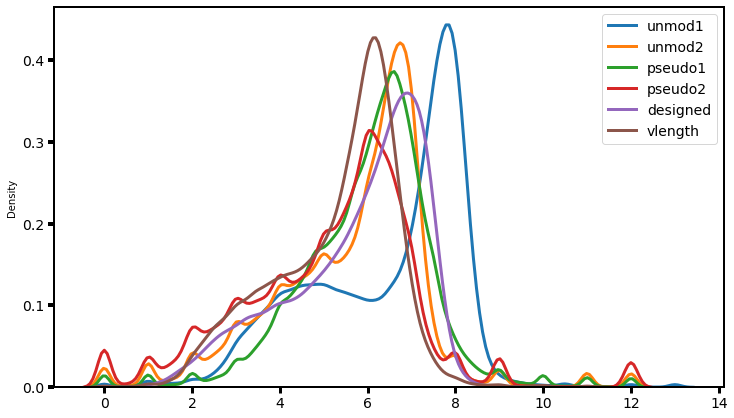

In [12]:
fig = plt.figure(figsize=(12,7))
for df,name in zip(DF_ls,DF_name):
    sns.kdeplot(df.rl.values,linewidth=3,alpha=0.1,label=name)
plt.legend(fontsize=14);

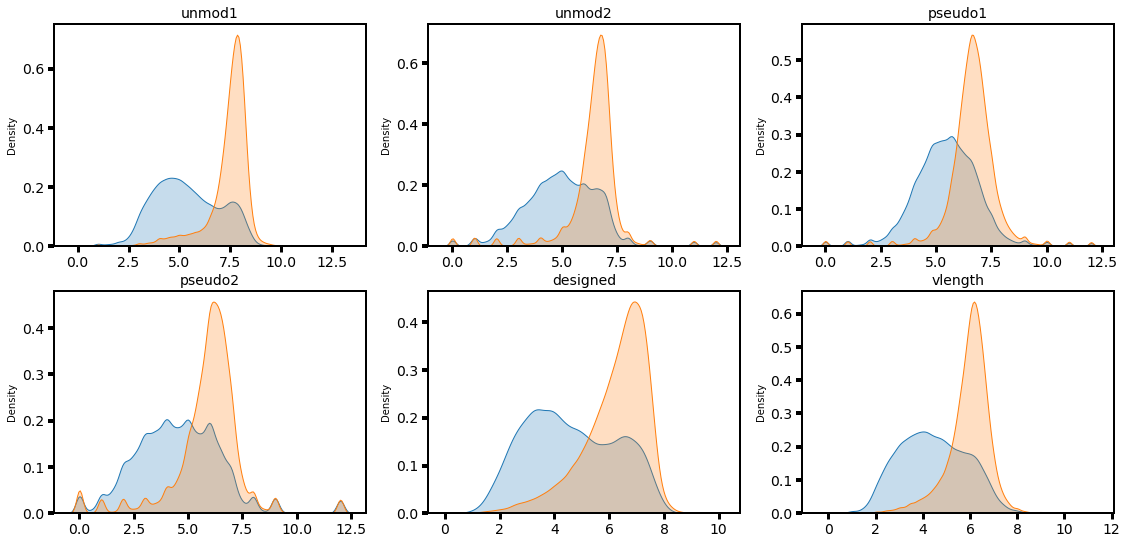

In [17]:
fig = plt.figure(figsize=(19,9))

for i in range(6):
    axs = fig.add_subplot(2,3,1+i)
    df = DF_ls[i]
    #sns.kdeplot(df.rl.values,linewidth=2)
    axs.set_title(DF_name[i],fontsize=14)
    sns.kdeplot(df[df.with_uAUG == 1].rl.values, shade='blue')
    sns.kdeplot(df[df.with_uAUG == 0].rl.values, shade='red')
    

In [9]:
DF_ls[1].utr.values[9]

'CCAAATGGGCTCTTATGAGATACTGATTATGTATTCTACTCGGTAGAGCTATGGGCGAA'

### understanding the quantification of MRL

<font size=5 color='darkgreen'> - **the reads count of a UTR is first normalized within each gradience fraction to get relative occurence. (this is columns `['0' ~ '13']`)**  
    - **Then relative occurence sum up to a total relative occurence (`'total'`), with which we can have a proportion a UTR at each fraction by dividing to its total relative occurence**  
    - **Dividing relative proportion to its `total`, we will have the relative proportion (`['r0' ~ 'r13']`)**  </font>  
<font size=5>    - **$MRL = \sum_{R=0}^{13} \textbf{#Ribosome}*\textbf{relative proportion}$**

In [54]:
DF_ls[0].loc[:]

Index(['Unnamed: 0', 'utr', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', 'total_reads', 'total', 'r0', 'r1', 'r2', 'r3',
       'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'rl',
       'with_uAUG'],
      dtype='object')

In [13]:
relative_proportion = np.divide(DF_ls[0].loc[:,['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10', '11', '12', '13']].values , DF_ls[0].loc[:,'total'].values.reshape(-1,1))

In [64]:
DF_ls[0].loc[:,['r0', 'r1', 'r2', 'r3','r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13']]

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13
0,0.295038,0.235525,0.123528,0.071705,0.033134,0.033645,0.020343,0.019850,0.017988,0.019283,0.033252,0.033252,0.027581,0.035877
1,0.168481,0.175847,0.163766,0.122049,0.057629,0.049711,0.028540,0.027431,0.024766,0.024241,0.039457,0.039457,0.039840,0.038785
2,0.232039,0.213274,0.155940,0.091302,0.044013,0.042436,0.022460,0.025015,0.024275,0.021591,0.028353,0.028353,0.028963,0.041985
3,0.205891,0.188284,0.158895,0.101863,0.065599,0.041241,0.025793,0.022751,0.022632,0.026617,0.038302,0.038302,0.032788,0.031043
4,0.119116,0.121273,0.137511,0.139351,0.088545,0.071306,0.040719,0.033335,0.030367,0.033080,0.051449,0.051449,0.046052,0.036447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
326029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
326030,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
326031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
relative_count

array([[0.29503809, 0.23552466, 0.1235284 , ..., 0.03325161, 0.02758094,
        0.03587681],
       [0.16848091, 0.17584691, 0.16376579, ..., 0.03945715, 0.03983962,
        0.03878544],
       [0.23203905, 0.21327431, 0.1559403 , ..., 0.02835329, 0.02896287,
        0.04198518],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [69]:
np.array(range(14))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [72]:
test_0_all_rl = DF_ls[0].loc[1,['r0', 'r1', 'r2', 'r3','r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13']].values

In [75]:
test_0_all_rl@(np.array(range(14))-0.1)

3.8390358751468003

In [65]:
DF_ls[0].loc[:,'rl']

0         3.039939
1         3.895109
2         3.334524
3         3.575082
4         4.593712
            ...   
326028    5.800000
326029    5.800000
326030    0.000000
326031    5.800000
326032    1.000000
Name: rl, Length: 326033, dtype: float64